In [515]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [516]:
df = pd.read_csv('Used_Car_Price_Prediction.csv')

In [517]:
df.head()

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,...,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
0,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,...,2,397677,404177.0,great,2021-04-04T07:09:18.583,True,8975,57960,False,False
1,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,...,1,272935,354313.0,great,2021-03-22T14:07:32.833,True,6167,39825,False,False
2,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,...,1,469605,NaN,great,2021-03-20T05:36:31.311,True,11096,71655,False,False
3,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,...,1,294262,374326.0,great,2021-01-21T12:59:19.299,True,7154,46200,False,False
4,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,...,1,360716,367216.0,great,2021-04-01T13:33:40.733,True,8397,54225,False,False


# EDA

In [518]:
df.columns

Index(['car_name', 'yr_mfr', 'fuel_type', 'kms_run', 'sale_price', 'city',
       'times_viewed', 'body_type', 'transmission', 'variant', 'assured_buy',
       'registered_city', 'registered_state', 'is_hot', 'rto', 'source',
       'make', 'model', 'car_availability', 'total_owners', 'broker_quote',
       'original_price', 'car_rating', 'ad_created_on', 'fitness_certificate',
       'emi_starts_from', 'booking_down_pymnt', 'reserved', 'warranty_avail'],
      dtype='object')

In [519]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7400 entries, 0 to 7399
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             7400 non-null   object 
 1   yr_mfr               7400 non-null   int64  
 2   fuel_type            7400 non-null   object 
 3   kms_run              7400 non-null   int64  
 4   sale_price           7400 non-null   int64  
 5   city                 7400 non-null   object 
 6   times_viewed         7400 non-null   int64  
 7   body_type            7297 non-null   object 
 8   transmission         6844 non-null   object 
 9   variant              7400 non-null   object 
 10  assured_buy          7400 non-null   bool   
 11  registered_city      7390 non-null   object 
 12  registered_state     7390 non-null   object 
 13  is_hot               7400 non-null   bool   
 14  rto                  7400 non-null   object 
 15  source               7274 non-null   o

<Axes: xlabel='sale_price', ylabel='Count'>

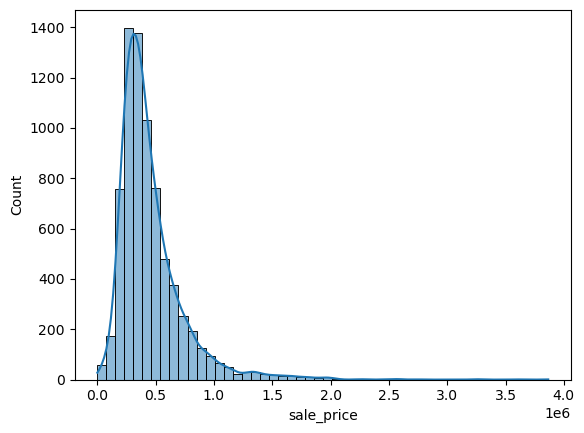

In [520]:
sns.histplot(data=df,x='sale_price',kde=True,bins=50)

<Axes: xlabel='yr_mfr', ylabel='Count'>

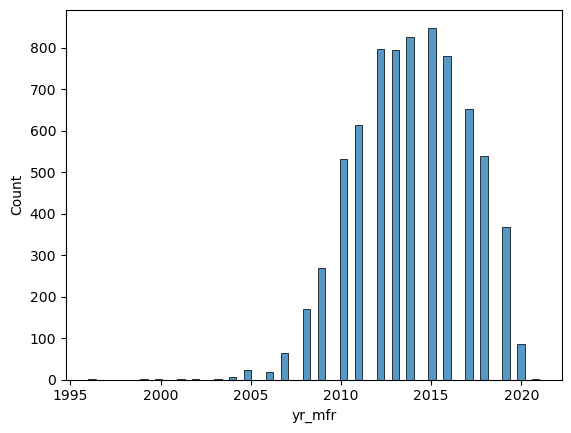

In [521]:
sns.histplot(df['yr_mfr'])

<Figure size 1200x800 with 0 Axes>

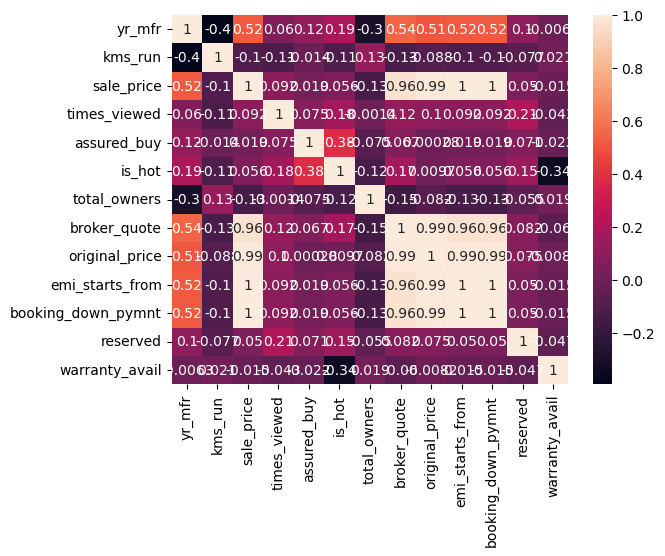

<Figure size 1200x800 with 0 Axes>

In [522]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.figure(figsize=(12,8))

# Data Cleaning

In [523]:
df.shape

(7400, 29)

In [524]:
df.duplicated().sum()

np.int64(1)

In [525]:
df = df.drop_duplicates()

In [526]:
df.isna().sum()

car_name                  0
yr_mfr                    0
fuel_type                 0
kms_run                   0
sale_price                0
city                      0
times_viewed              0
body_type               103
transmission            556
variant                   0
assured_buy               0
registered_city          10
registered_state         10
is_hot                    0
rto                       0
source                  126
make                      0
model                     0
car_availability        620
total_owners              0
broker_quote              0
original_price         3279
car_rating                9
ad_created_on             1
fitness_certificate       8
emi_starts_from           0
booking_down_pymnt        0
reserved                  0
warranty_avail            0
dtype: int64

In [527]:
df.columns

Index(['car_name', 'yr_mfr', 'fuel_type', 'kms_run', 'sale_price', 'city',
       'times_viewed', 'body_type', 'transmission', 'variant', 'assured_buy',
       'registered_city', 'registered_state', 'is_hot', 'rto', 'source',
       'make', 'model', 'car_availability', 'total_owners', 'broker_quote',
       'original_price', 'car_rating', 'ad_created_on', 'fitness_certificate',
       'emi_starts_from', 'booking_down_pymnt', 'reserved', 'warranty_avail'],
      dtype='object')

In [528]:
unwanted = ['car_name','city','body_type','total_owners','times_viewed','rto','assured_buy','registered_city', 'registered_state','source','car_availability','broker_quote','original_price','ad_created_on', 'fitness_certificate','emi_starts_from', 'booking_down_pymnt', 'reserved', 'warranty_avail']
df = df.drop(columns=unwanted)

In [529]:
df.head()

,yr_mfr,fuel_type,kms_run,sale_price,transmission,variant,is_hot,make,model,car_rating
0,2015,petrol,8063,386399,manual,lxi opt,True,maruti,swift,great
1,2016,petrol,23104,265499,manual,lxi,True,maruti,alto 800,great
2,2017,petrol,23402,477699,manual,sports 1.2 vtvt,True,hyundai,grand i10,great
3,2013,diesel,39124,307999,manual,vdi,True,maruti,swift,great
4,2015,petrol,22116,361499,manual,magna 1.2 vtvt,True,hyundai,grand i10,great


In [530]:
df.isna().sum()

yr_mfr            0
fuel_type         0
kms_run           0
sale_price        0
transmission    556
variant           0
is_hot            0
make              0
model             0
car_rating        9
dtype: int64

In [531]:
df.loc[df['transmission'].isna(),'transmission'] = df['transmission'].mode()[0]

In [532]:
df.isna().sum()

yr_mfr          0
fuel_type       0
kms_run         0
sale_price      0
transmission    0
variant         0
is_hot          0
make            0
model           0
car_rating      9
dtype: int64

In [533]:
df['transmission'].mode()[0]

'manual'

In [534]:
df['car_rating'] = df['car_rating'].fillna(df['transmission'].mode()[0])

In [535]:
df.isnull().sum()

yr_mfr          0
fuel_type       0
kms_run         0
sale_price      0
transmission    0
variant         0
is_hot          0
make            0
model           0
car_rating      0
dtype: int64

<Axes: >

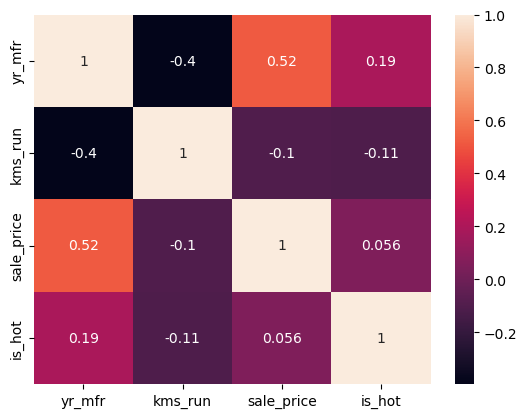

In [536]:
sns.heatmap(data=df.corr(numeric_only=True), annot=True)

<Axes: ylabel='sale_price'>

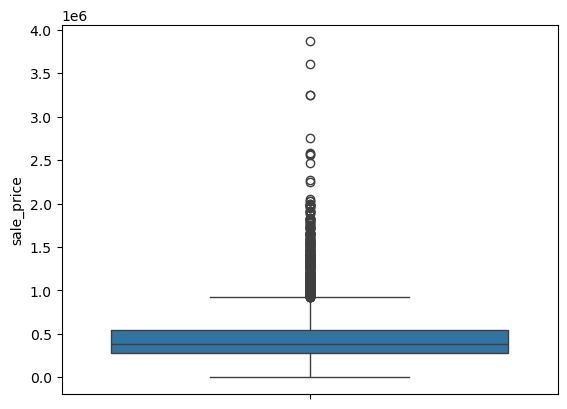

In [537]:
sns.boxplot(df['sale_price'])

<Axes: ylabel='kms_run'>

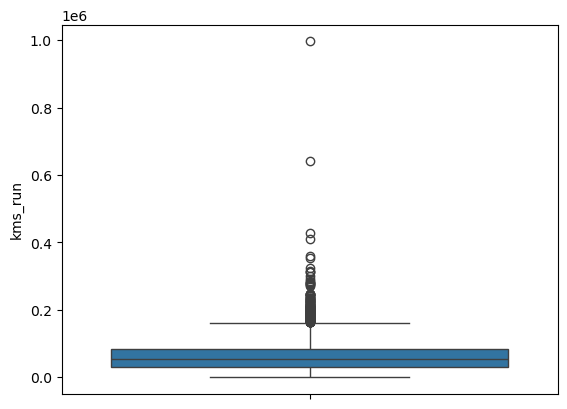

In [538]:
sns.boxplot(df['kms_run'])

In [539]:
df['sale_price'].sort_values(ascending=True)

2513          0
2504          0
2505          0
266          35
6277      20000
         ...   
7242    2750000
3756    3250000
7310    3250000
5970    3600000
6900    3866000
Name: sale_price, Length: 7399, dtype: int64

In [540]:
df = df[df['sale_price'] >= 20000]

In [541]:
df['variant'].value_counts()

variant
vxi                  674
lxi                  491
vdi                  243
vdi bs iv            131
lxi cng              126
                    ... 
e 220 cdi classic      1
1.8 j                  1
vxi regalia            1
1.4 s                  1
230 avantgarde         1
Name: count, Length: 942, dtype: int64

In [542]:
df['variant'] = df['variant'].apply(lambda x: x.split(' ')[0])

In [543]:
def flag(x):
    try :
        pd.to_numeric(x)
        return 0
    except ValueError:
        return x

In [544]:
df['variant'] = df['variant'].apply(flag)

In [545]:
df = df[df['variant'] != 0]

### Handling Outliers in Prices

In [546]:
q1 = np.percentile(df['sale_price'],25)
q3 = np.percentile(df['sale_price'],75)
iqr = q3 - q1
print(q1,q3,iqr)

273299.0 510999.0 237700.0


In [547]:
uf = q3 + iqr *1.5
lf = q1 - iqr *1.5
print(uf,lf)

867549.0 -83251.0


In [548]:
df.loc[df['sale_price'] > uf,'sale_price'] = uf

In [549]:
df.loc[df['sale_price'] > uf]

,yr_mfr,fuel_type,kms_run,sale_price,transmission,variant,is_hot,make,model,car_rating


#### Kms_run

In [550]:
q1 = np.percentile(df['kms_run'],25)
q3 = np.percentile(df['kms_run'],75)

iqr = q3 - q1

uf = q3 + 1.5 * iqr
df.loc[df['kms_run'] > uf,'kms_run'] =uf

# One Hot Encoding

In [551]:
df.head()

,yr_mfr,fuel_type,kms_run,sale_price,transmission,variant,is_hot,make,model,car_rating
0,2015,petrol,8063,386399,manual,lxi,True,maruti,swift,great
1,2016,petrol,23104,265499,manual,lxi,True,maruti,alto 800,great
2,2017,petrol,23402,477699,manual,sports,True,hyundai,grand i10,great
3,2013,diesel,39124,307999,manual,vdi,True,maruti,swift,great
4,2015,petrol,22116,361499,manual,magna,True,hyundai,grand i10,great


In [552]:
non_num = ['fuel_type','transmission','variant','make','model','car_rating']
x = df.drop(columns='sale_price')
y = df['sale_price']
x_one_encode = pd.get_dummies(data=x,columns= non_num,drop_first=True)

In [553]:
x.corr(numeric_only=True)

,yr_mfr,kms_run,is_hot
yr_mfr,1.000000,-0.420978,0.184445
kms_run,-0.420978,1.000000,-0.108819
is_hot,0.184445,-0.108819,1.000000


In [554]:
x_one_encode

,yr_mfr,kms_run,is_hot,fuel_type_electric,fuel_type_petrol,fuel_type_petrol & cng,fuel_type_petrol & lpg,transmission_manual,variant_1.5ambiente,variant_1.5titanium,...,model_yaris,model_yeti,model_zen,model_zen estilo,model_zest,model_zs ev,car_rating_good,car_rating_great,car_rating_manual,car_rating_overpriced
0,2015,8063,True,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,2016,23104,True,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,2017,23402,True,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,2013,39124,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,2015,22116,True,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7392,2010,40666,True,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
7393,2012,88973,True,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
7394,2002,77323,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,True
7396,2018,8854,True,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [555]:
# converting DataFrame to int datatype
x_one_encode = x_one_encode.astype(int)

In [556]:
x_one_encode.head()

,yr_mfr,kms_run,is_hot,fuel_type_electric,fuel_type_petrol,fuel_type_petrol & cng,fuel_type_petrol & lpg,transmission_manual,variant_1.5ambiente,variant_1.5titanium,...,model_yaris,model_yeti,model_zen,model_zen estilo,model_zest,model_zs ev,car_rating_good,car_rating_great,car_rating_manual,car_rating_overpriced
0,2015,8063,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2016,23104,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2017,23402,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2013,39124,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2015,22116,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


# Label Encoding

In [557]:
from sklearn.preprocessing import LabelEncoder

x_label = x.copy()

for col in non_num:
    le = LabelEncoder() 
    x_label[col] = le.fit_transform(x_label[col])

In [558]:
x_label.head()

,yr_mfr,fuel_type,kms_run,transmission,variant,is_hot,make,model,car_rating
0,2015,2,8063,1,94,True,13,115,2
1,2016,2,23104,1,94,True,13,8,2
2,2017,2,23402,1,130,True,7,53,2
3,2013,0,39124,1,155,True,13,115,2
4,2015,2,22116,1,96,True,7,53,2


In [559]:
# Converting this df into interger type 
x_label = x_label.astype(int)

# Scaling

In [560]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

In [561]:
x_one_encode.head(2)

,yr_mfr,kms_run,is_hot,fuel_type_electric,fuel_type_petrol,fuel_type_petrol & cng,fuel_type_petrol & lpg,transmission_manual,variant_1.5ambiente,variant_1.5titanium,...,model_yaris,model_yeti,model_zen,model_zen estilo,model_zest,model_zs ev,car_rating_good,car_rating_great,car_rating_manual,car_rating_overpriced
0,2015,8063,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2016,23104,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [562]:
col_to_scale = ['yr_mfr','kms_run']
x_one_encode[col_to_scale] = scale.fit_transform(x_one_encode[col_to_scale])
x_one_encode

,yr_mfr,kms_run,is_hot,fuel_type_electric,fuel_type_petrol,fuel_type_petrol & cng,fuel_type_petrol & lpg,transmission_manual,variant_1.5ambiente,variant_1.5titanium,...,model_yaris,model_yeti,model_zen,model_zen estilo,model_zest,model_zs ev,car_rating_good,car_rating_great,car_rating_manual,car_rating_overpriced
0,0.409133,-1.425840,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.736535,-1.013979,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.063936,-1.005819,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,-0.245670,-0.575312,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.409133,-1.041033,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7392,-1.227875,-0.533088,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7393,-0.573072,0.789679,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7394,-3.847088,0.470673,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
7396,1.391338,-1.404180,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [563]:
x_label.columns

Index(['yr_mfr', 'fuel_type', 'kms_run', 'transmission', 'variant', 'is_hot',
       'make', 'model', 'car_rating'],
      dtype='object')

In [564]:
all_cols = ['yr_mfr', 'fuel_type', 'kms_run', 'transmission','variant', 'is_hot', 'make', 'model','car_rating']
#x_label[all_cols] = scale.fit_transform(x_label[all_cols])
x_label

,yr_mfr,fuel_type,kms_run,transmission,variant,is_hot,make,model,car_rating
0,2015,2,8063,1,94,1,13,115,2
1,2016,2,23104,1,94,1,13,8,2
2,2017,2,23402,1,130,1,7,53,2
3,2013,0,39124,1,155,1,13,115,2
4,2015,2,22116,1,96,1,7,53,2
...,...,...,...,...,...,...,...,...,...
7392,2010,2,40666,1,162,1,13,9,2
7393,2012,2,88973,1,150,1,22,69,2
7394,2002,4,77323,1,16,0,13,2,4
7396,2018,2,8854,1,38,1,13,61,2


In [565]:
y

0       386399
1       265499
2       477699
3       307999
4       361499
         ...  
7392    189699
7393    448699
7394     35000
7396    562599
7398    284099
Name: sale_price, Length: 6201, dtype: int64

# Model Creation

In [566]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [567]:
x_train,x_test,y_train,y_test = train_test_split(x_one_encode,y,test_size=0.30,random_state=42)

In [568]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [569]:
y_pred = model.predict(x_test)
y_pred

array([370987.05483373, 345937.06811384, 320437.25699312, ...,
       379637.61327277, 473483.10928395, 336195.29678001])

In [570]:
y_test

6395    370000
2896    399899
2949    245899
6461    419199
1520    727999
         ...  
2921    344699
1229    539099
1910    321199
5825    468499
6984    312199
Name: sale_price, Length: 1861, dtype: int64

### Label Method

In [571]:
model_label = LinearRegression()
x_train_lab,x_test_lab,y_train_lab,y_test_lab = train_test_split(x_label,y,test_size=0.20,random_state=42)

In [572]:
model_label.fit(x_train_lab,y_train_lab)

LinearRegression()

In [573]:
y_pred_lab = model_label.predict(x_test_lab)
y_pred_lab

array([457024.3168163 , 338525.08762601, 295599.50784028, ...,
       477932.17039134, 255842.22494262, 421771.64146332])

In [574]:
y_test_lab

6395    370000
2896    399899
2949    245899
6461    419199
1520    727999
         ...  
4341    493099
2758    324599
4466    362999
839     302699
883     522099
Name: sale_price, Length: 1241, dtype: int64

# Evaluation

In [575]:
r2 = r2_score(y_test,y_pred)

In [576]:
r2

0.8878531470448171

In [577]:
n= x_test.shape[0]
p= x_test.shape[1]
adj_r2 = 1 -((1 - r2) * (n-1)/(n - p - 1))
adj_r2

0.8593437987210788

In [578]:
model_dict = dict()
for col1 in x['make'].unique():
        models_list = x.loc[x['make'] == col1,'model'].unique()
        model_dict[col1] = list(models_list)
print(model_dict)

{'maruti': ['swift', 'alto 800', 'alto k10', 'ritz', 'alto', 'swift dzire', 'celerio', 'baleno', 'wagon r 1.0', 'vitara brezza', 'dzire', 'ertiga', 'sx4', 'zen estilo', 'new  wagon-r', 'xl6', 'ciaz', 's cross', 'wagon r stingray', 'esteem', 'wagon r', 'omni e', 'a star', 'ignis', 'wagon r duo', 'zen', 's presso', 'celerio x', 'omni', '800'], 'hyundai': ['grand i10', 'i20', 'elite i20', 'i10', 'eon', 'verna', 'santro xing', 'xcent', 'new elantra', 'venue', 'accent', 'grand i10 nios', 'santa fe', 'santro', 'tucson new', 'aura', 'new santro'], 'renault': ['kwid', 'scala', 'pulse', 'duster', 'captur'], 'honda': ['city', 'civic', 'jazz', 'city zx'], 'nissan': ['sunny', 'terrano', 'micra', 'micra active', 'kicks', 'evalia'], 'toyota': ['etios liva', 'corolla altis', 'etios', 'camry', 'corolla', 'yaris', 'glanza', 'innova crysta'], 'tata': ['tiago', 'harrier', 'nano', 'indica vista', 'hexa', 'tigor', 'bolt', 'nexon ', 'aria', 'safari', 'zest', 'manza', 'sumo gold', 'indica v2', 'indigo ecs', 

In [579]:
model_var = dict()
for col1 in x['model'].unique():
        variant_list = x.loc[x['model'] == col1,'variant'].unique()
        model_var[col1] = list(variant_list)
print(model_dict)

{'maruti': ['swift', 'alto 800', 'alto k10', 'ritz', 'alto', 'swift dzire', 'celerio', 'baleno', 'wagon r 1.0', 'vitara brezza', 'dzire', 'ertiga', 'sx4', 'zen estilo', 'new  wagon-r', 'xl6', 'ciaz', 's cross', 'wagon r stingray', 'esteem', 'wagon r', 'omni e', 'a star', 'ignis', 'wagon r duo', 'zen', 's presso', 'celerio x', 'omni', '800'], 'hyundai': ['grand i10', 'i20', 'elite i20', 'i10', 'eon', 'verna', 'santro xing', 'xcent', 'new elantra', 'venue', 'accent', 'grand i10 nios', 'santa fe', 'santro', 'tucson new', 'aura', 'new santro'], 'renault': ['kwid', 'scala', 'pulse', 'duster', 'captur'], 'honda': ['city', 'civic', 'jazz', 'city zx'], 'nissan': ['sunny', 'terrano', 'micra', 'micra active', 'kicks', 'evalia'], 'toyota': ['etios liva', 'corolla altis', 'etios', 'camry', 'corolla', 'yaris', 'glanza', 'innova crysta'], 'tata': ['tiago', 'harrier', 'nano', 'indica vista', 'hexa', 'tigor', 'bolt', 'nexon ', 'aria', 'safari', 'zest', 'manza', 'sumo gold', 'indica v2', 'indigo ecs', 

In [580]:
tran_list = dict()
for col in x['variant'].unique() :
        temp = x[x['variant'] == col]['transmission'].unique()
        tran_list[col] = list(temp)
print(tran_list)

{'lxi': ['manual'], 'sports': ['manual'], 'vdi': ['manual', 'automatic'], 'magna': ['manual', 'automatic'], 'vxi': ['manual', 'automatic'], 'asta': ['manual', 'automatic'], 'rxl': ['manual', 'automatic'], 'sportz': ['manual', 'automatic'], 's': ['manual', 'automatic'], 'd': ['manual'], 'era': ['manual'], 'fluidic': ['manual', 'automatic'], 'gls': ['manual', 'automatic'], 'xl': ['manual', 'automatic'], 'gl': ['manual'], 'alpha': ['manual', 'automatic'], 'zdi': ['manual', 'automatic'], 'ldi': ['manual'], 'rxz': ['manual', 'automatic'], 'rxt': ['manual', 'automatic'], 'sportz(o)': ['manual'], 'xt': ['manual'], 'g': ['manual', 'automatic'], 'zxi': ['manual', 'automatic'], 't': ['manual'], 'zeta': ['manual', 'automatic'], 'w8': ['manual'], 'comfortline': ['manual', 'automatic'], 's8': ['manual'], 's10': ['manual', 'automatic'], 'highline': ['manual', 'automatic'], '1.5titanium': ['manual'], 'xv': ['manual', 'automatic'], 'lx': ['manual'], 't8': ['automatic', 'manual'], 'v': ['manual', 'auto

In [581]:
import joblib
joblib.dump(model,'UsedCarPriceLinearRegression.plk')
joblib.dump(scale,'UsedCarScale.plk')
joblib.dump(x_one_encode.columns.tolist(),'UsedCarColumns.plk')
joblib.dump(model_var,'UsedCarVariantList.plk')
joblib.dump(x['make'].unique().tolist(),'UsedCarMakeList.plk')
joblib.dump(model_dict,'UsedCarModelList.plk')
joblib.dump(tran_list,'UsedCarModelTransmissionList.plk')

['UsedCarModelTransmissionList.plk']

In [582]:
x['transmission'].unique()

array(['manual', 'automatic'], dtype=object)

In [583]:
x['car_rating'].unique().tolist()

['great', 'good', 'fair', 'overpriced', 'manual']

In [584]:
x['fuel_type'].unique()

array(['petrol', 'diesel', 'petrol & cng', 'electric', 'petrol & lpg'],
      dtype=object)

In [585]:
x

,yr_mfr,fuel_type,kms_run,transmission,variant,is_hot,make,model,car_rating
0,2015,petrol,8063,manual,lxi,True,maruti,swift,great
1,2016,petrol,23104,manual,lxi,True,maruti,alto 800,great
2,2017,petrol,23402,manual,sports,True,hyundai,grand i10,great
3,2013,diesel,39124,manual,vdi,True,maruti,swift,great
4,2015,petrol,22116,manual,magna,True,hyundai,grand i10,great
...,...,...,...,...,...,...,...,...,...
7392,2010,petrol,40666,manual,vxi,True,maruti,alto k10,great
7393,2012,petrol,88973,manual,trendline,True,volkswagen,jetta,great
7394,2002,petrol & lpg,77323,manual,ac,False,maruti,800,overpriced
7396,2018,petrol,8854,manual,delta,True,maruti,ignis,great


In [586]:
x[x['variant'] == 'trendline']['transmission'].unique()

array(['manual'], dtype=object)